In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision import datasets
import matplotlib.pyplot as plt

In [35]:
train_data = datasets.MNIST('',train=True,download=True,transform=transform.ToTensor())
test_data = datasets.MNIST('',train=False,download=True,transform=transform.ToTensor())

In [36]:
train_loader = torch.utils.data.DataLoader(train_data,batch_size=12,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=12)
data_shape = train_loader.dataset.data.shape[1:3]
input_data_len = data_shape[0] * data_shape[1]

In [37]:
class MLP(nn.Module):
    def __init__(self,input_size,output_size,hidden_layer,seed=0):
        super().__init__()
        self.in_dim = input_size
        self.out_dim = output_size
        self.hidden = hidden_layer
        dim_seed = 1
        compare = 1
        while compare < self.out_dim :
            dim_seed = dim_seed +1
            compare = compare<<1
        dim_seed += seed
        self.linears = nn.ModuleList()
        self.linears.append(nn.Linear(self.in_dim,2**(self.hidden+dim_seed)))
        for i in range(hidden_layer) :
            self.linears.append(nn.Linear(2**(self.hidden+dim_seed - i),2**(self.hidden+dim_seed - i -1)))
        self.linears.append(nn.Linear(2**(dim_seed),self.out_dim))
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
    def forward(self,x):
        x = x.view(-1,self.in_dim)
        for i,l in enumerate(self.linears):
            if i != len(self.linears)-1:
                x = self.relu(l(x))
            else:
                x = l(x)
        return x

In [45]:
models = []
criterions = []
optimizers = []
models_loss = []
for i in range(4):
    models.append(MLP(input_data_len,10,2,seed=i))
    criterions.append(nn.CrossEntropyLoss())
    optimizers.append(optim.SGD(models[i].parameters(),lr=0.01))
    models_loss.append([])
    

In [46]:
for epoch in range(10) :
    print("epoch : ",epoch+1)
    for model , criterion , optimizer,model_loss in zip(models,criterions,optimizers,models_loss):
        running_loss = 0
        for i,data in enumerate(train_loader,0):
            inputs,labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss = (running_loss*i +  loss.item())/(i+1)
            model_loss.append(running_loss)
        print(running_loss)
print("Finish")

epoch :  1
0.9052347235478434
0.8819698723685002
0.829406353437157
0.7550834376484161
epoch :  2
0.27182793752010775
0.26275505664674537
0.24209335929551115
0.2250843078857756
epoch :  3
0.1827399255991447
0.16774263536701903
0.15767437507624274
0.1480694831416475
epoch :  4
0.13866023621351883
0.1208122817120513
0.11511100157981277
0.10933382977616275
epoch :  5
0.11123125478872098
0.09485696959330256
0.08986616641617133
0.08392517626020128
epoch :  6
0.09261368636964458
0.07799014161753032
0.07229691250980806
0.06660039333150489
epoch :  7
0.07747372654955845
0.06469988808694777
0.05907603295439622
0.05438537598259862
epoch :  8
0.06729657146018023
0.05467287034411855
0.048268225486221505
0.04300741072451196
epoch :  9
0.05731336505497453
0.045901997688967064
0.04036440706312284
0.03503437316423887
epoch :  10
0.050701663916287436
0.03880214776565986
0.034071095007929784
0.028288001119886736
Finish


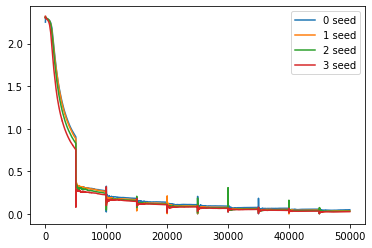

In [48]:
for i,model_loss in enumerate(models_loss):
    X = [i for i in range(len(model_loss))]
    plt.plot(X,model_loss,label=str(i)+' seed')
plt.legend(loc='upper right')
plt.show()